In [33]:
import illustris_python as il
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 360

# Scripts

### Group Catalogs (~100 MB)

In [24]:
basePath = './Illustris-3/output/'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [25]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])

In [26]:
subhalos['SubhaloMass'].shape

(121209,)

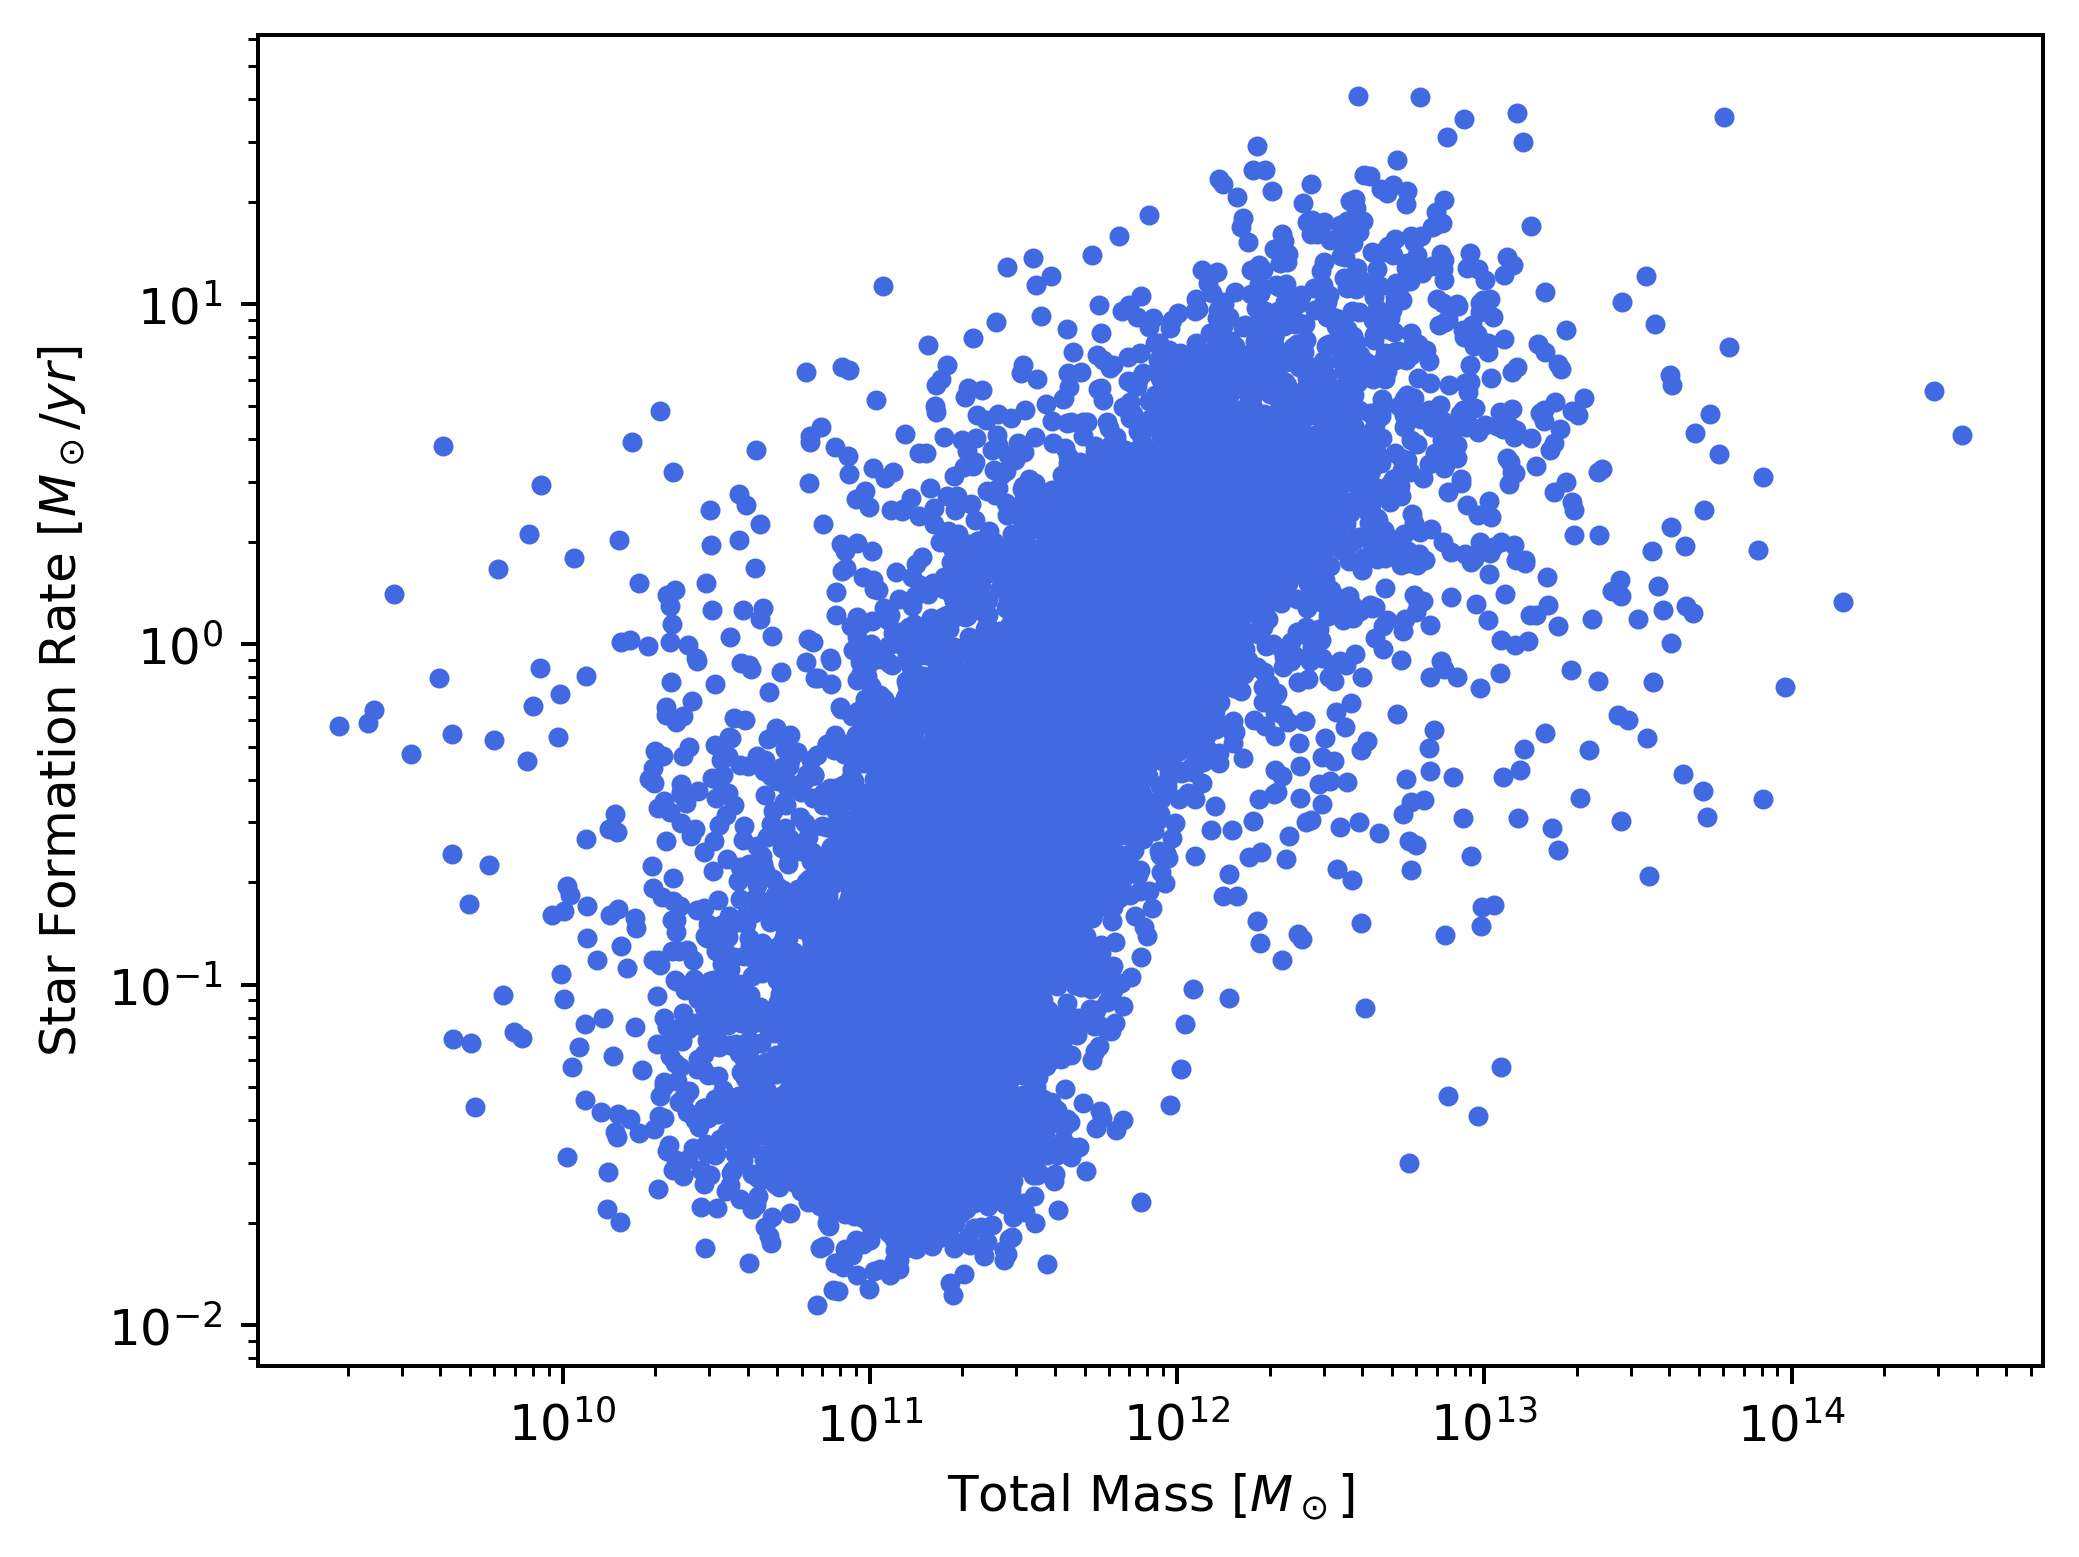

In [27]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.',c='royalblue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')
plt.show()

In [28]:
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])

In [29]:
GroupFirstSub.dtype, GroupFirstSub.shape

(dtype('uint32'), (131727,))

In [30]:
ptNumGas = il.snapshot.partTypeNum('gas') # 0
ptNumStars = il.snapshot.partTypeNum('stars') # 4
for i in range(5):
    all_fields = il.groupcat.loadSingle(basePath,135,subhaloID=GroupFirstSub[i])
    gas_mass   = all_fields['SubhaloMassInHalfRadType'][ptNumGas]
    stars_mass = all_fields['SubhaloMassInHalfRadType'][ptNumStars]
    frac = gas_mass / (gas_mass + stars_mass)
    print(f'{GroupFirstSub[i]}, {frac}')

0, 0.06888455152511597
608, 0.023693658411502838
1030, 0.06385146826505661
1396, 0.0035770488902926445
1801, 0.12220046669244766


### Merger Trees (~8GB)

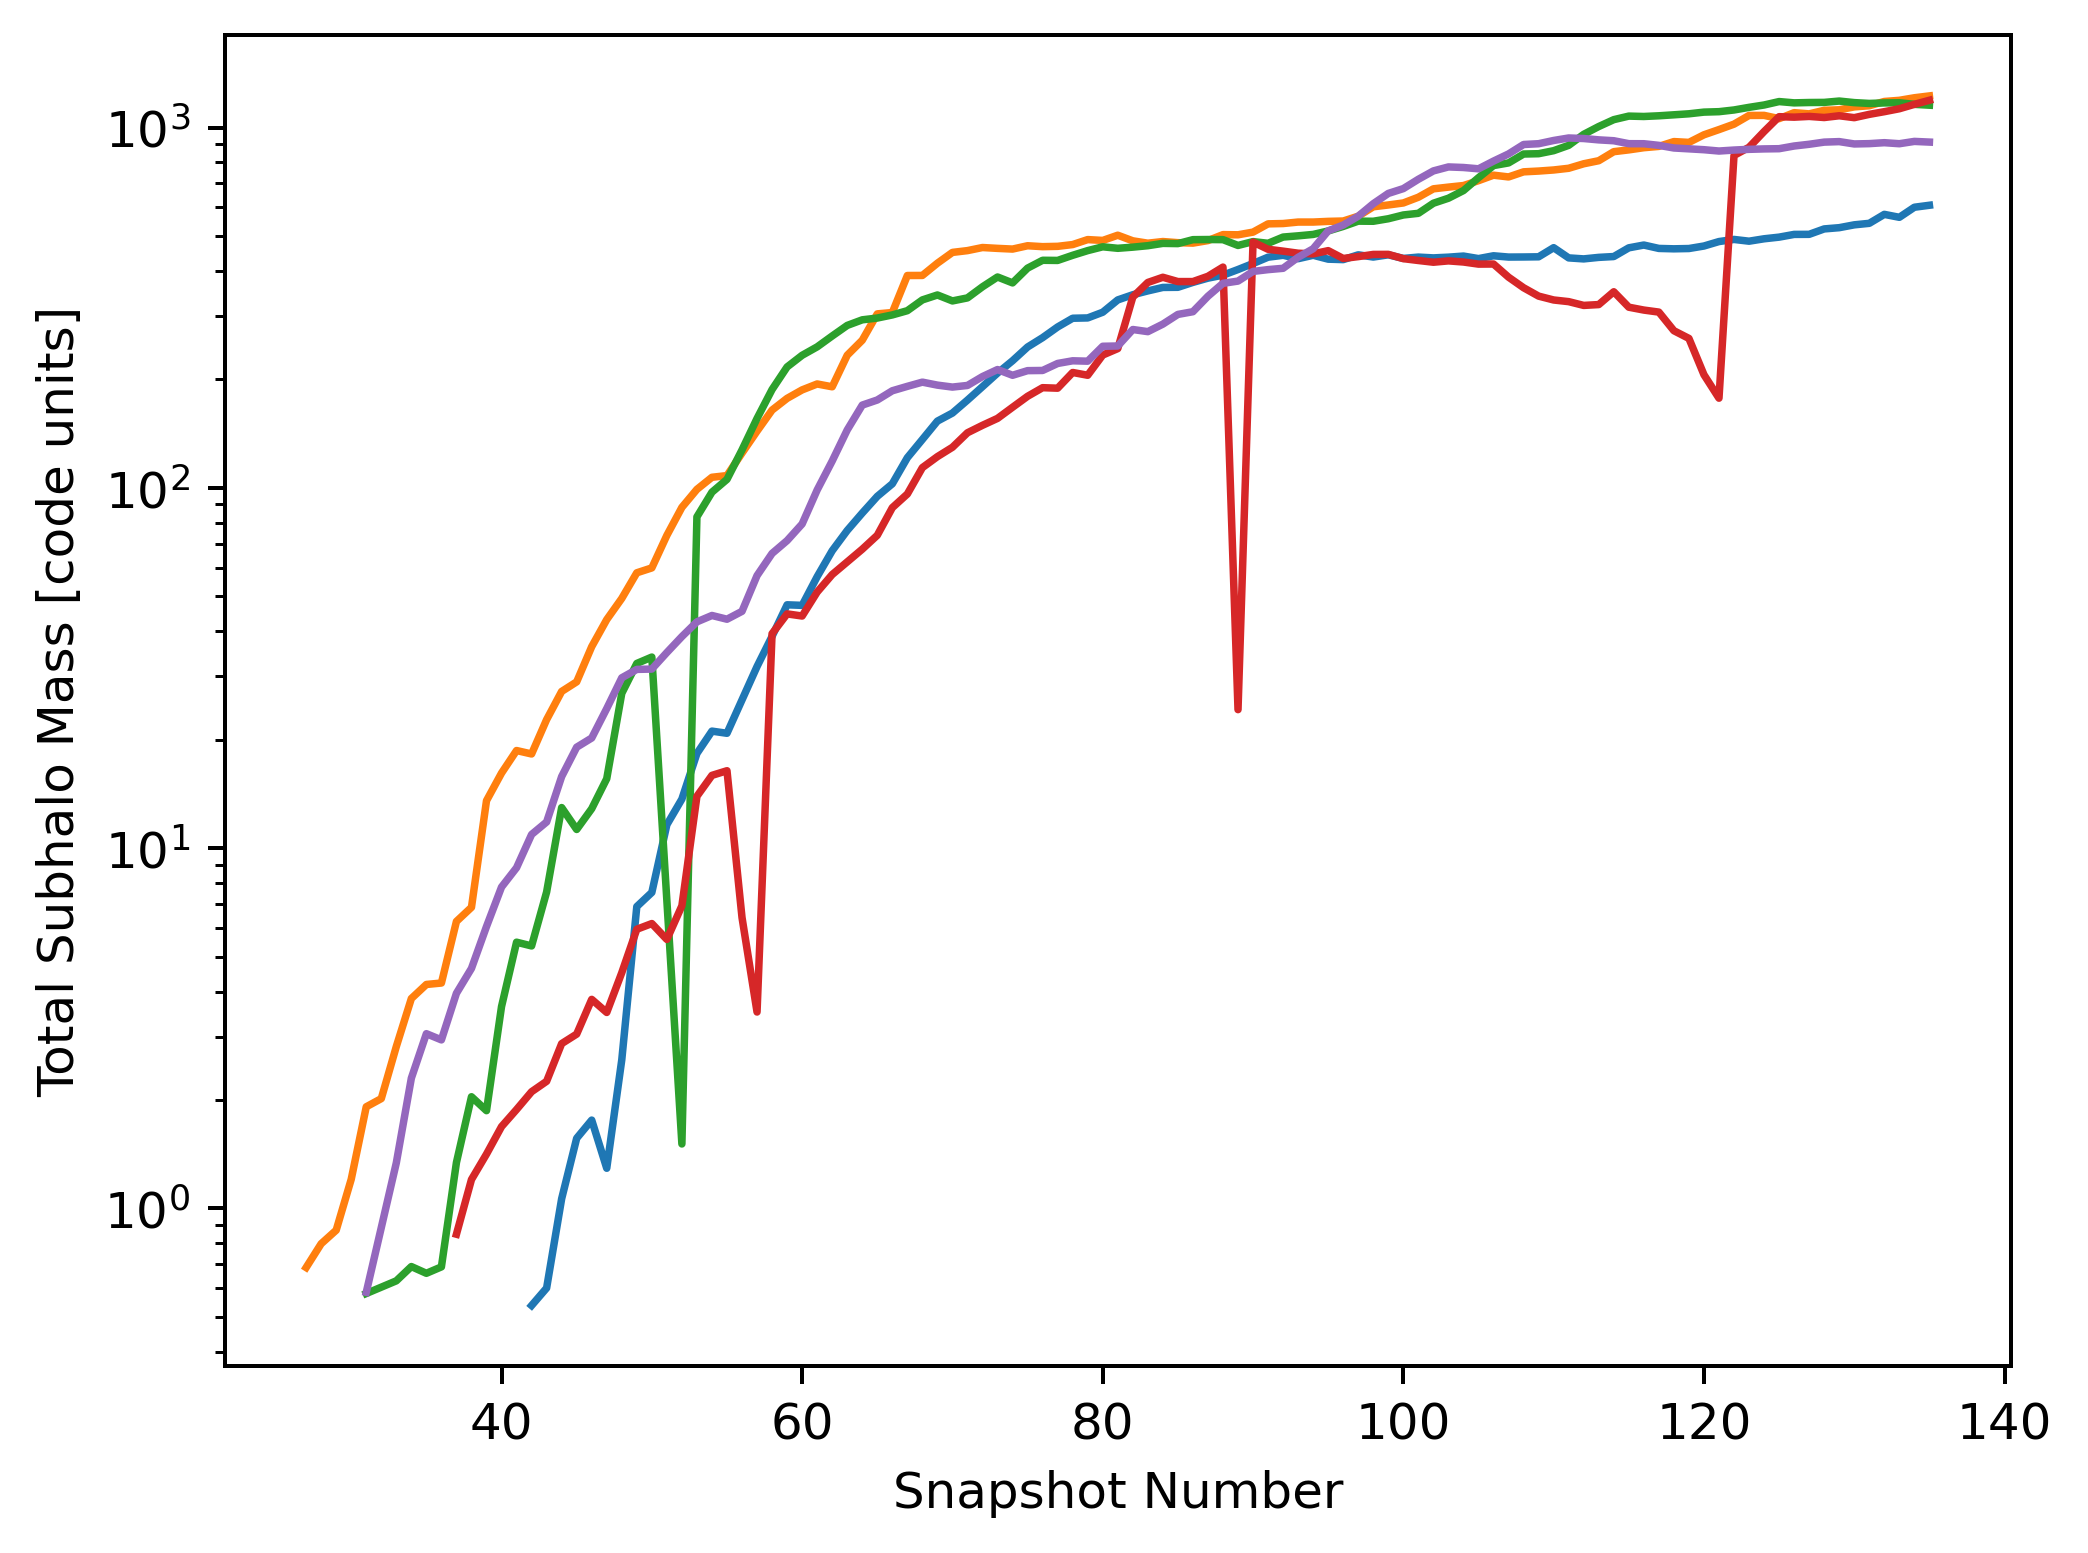

In [31]:
fields = ['SubhaloMass','SubfindID','SnapNum']
start = 100
for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')
plt.show()

In [32]:
ratio = 1.0/5.0

# the following fields are required for the walk and the mass ratio analysis
fields = ['SubhaloID','NextProgenitorID','MainLeafProgenitorID','FirstProgenitorID','SubhaloMassType']
for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields)
    numMergers = il.sublink.numMergers(tree,minMassRatio=ratio)
    print(f'{GroupFirstSub[i]}, {numMergers}')

9106, 4
9137, 2
9151, 3
9170, 5
9191, 2


# API

In [35]:
baseUrl = 'http://www.tng-project.org/api/'
headers = {'api-key':'b56809bfe934ba495c484f2f8eb21d22'} #custom API key

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [37]:
r = get(baseUrl)

r.keys(), len(r['simulations'])

(dict_keys(['simulations']), 65)

In [38]:
r['simulations'][0]

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [39]:
names = [sim['name'] for sim in r['simulations']]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

In [40]:
i = names.index('Illustris-3')
sim = get( r['simulations'][i]['url'] )
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [41]:
sim['snapshots']

'http://www.tng-project.org/api/Illustris-3/snapshots/'

In [42]:
snaps = get( sim['snapshots'] )
len(snaps)

136

In [43]:
snaps[-1]

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/'}

In [45]:
snap = get( snaps[-1]['url'] )
subs = get( snap['subhalos'] )
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])